In [1]:
#IMPORTING LIBRARIES FOR WEBSCRAPING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

In [2]:
#STORE URL IN VARIABLE
url = 'https://realpython.github.io/fake-jobs/'

#GET REQUESTS
r = requests.get(url)

#SOUP OBJECT
soup=BeautifulSoup(r.content, 'html.parser')

In [3]:
#STATUS CODE
r.status_code

200

In [4]:
#DISPLAY SOUP
soup

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Fake Python</title>
<link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
</head>
<body>
<section class="section">
<div class="container mb-5">
<h1 class="title is-1">
        Fake Python
      </h1>
<p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
</div>
<div class="container">
<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>

In [5]:
#FIND id="ResultsContainer"
results = soup.find(id="ResultsContainer")
print(results)

<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>
</div>
</div>
<div class="column is-half">


In [6]:
#FIND ALL "div", class_="card-content"
job_elements = results.find_all("div", class_="card-content")
print(job_elements)

[<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>, <div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://f

In [7]:
#DISPLAY JOB TITLE, COMPANY, LOCATION, AND DATE POSTED

title = []
company = []
location = []
date = []

for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    date_element = job_element.find("p", class_="is-small has-text-grey")
    
    title.append(title_element.text.strip())
    company.append(company_element.text.strip())
    location.append(location_element.text.strip())
    date.append(date_element.text.strip())
    
    print("Title:",title_element.text.strip())
    print("Company:",company_element.text.strip())
    print("Location:",location_element.text.strip())
    print ("Date Posted: ",date_element.text.strip(),"\n")

Title: Senior Python Developer
Company: Payne, Roberts and Davis
Location: Stewartbury, AA
Date Posted:  2021-04-08 

Title: Energy engineer
Company: Vasquez-Davidson
Location: Christopherville, AA
Date Posted:  2021-04-08 

Title: Legal executive
Company: Jackson, Chambers and Levy
Location: Port Ericaburgh, AA
Date Posted:  2021-04-08 

Title: Fitness centre manager
Company: Savage-Bradley
Location: East Seanview, AP
Date Posted:  2021-04-08 

Title: Product manager
Company: Ramirez Inc
Location: North Jamieview, AP
Date Posted:  2021-04-08 

Title: Medical technical officer
Company: Rogers-Yates
Location: Davidville, AP
Date Posted:  2021-04-08 

Title: Physiological scientist
Company: Kramer-Klein
Location: South Christopher, AE
Date Posted:  2021-04-08 

Title: Textile designer
Company: Meyers-Johnson
Location: Port Jonathan, AE
Date Posted:  2021-04-08 

Title: Television floor manager
Company: Hughes-Williams
Location: Osbornetown, AE
Date Posted:  2021-04-08 

Title: Waste mana

In [8]:
#TRANSFORMING WEBSCRAPED TO DATAFRAME

webscrape_data = {"Date Posted" : date,"Job" : title, "Company" : company, "Location" : location}

df = pd.DataFrame(webscrape_data)

print(df.head(),"\n\n")

print(df.info(),"\n")

  Date Posted                      Job                     Company  \
0  2021-04-08  Senior Python Developer    Payne, Roberts and Davis   
1  2021-04-08          Energy engineer            Vasquez-Davidson   
2  2021-04-08          Legal executive  Jackson, Chambers and Levy   
3  2021-04-08   Fitness centre manager              Savage-Bradley   
4  2021-04-08          Product manager                 Ramirez Inc   

               Location  
0       Stewartbury, AA  
1  Christopherville, AA  
2   Port Ericaburgh, AA  
3     East Seanview, AP  
4   North Jamieview, AP   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date Posted  100 non-null    object
 1   Job          100 non-null    object
 2   Company      100 non-null    object
 3   Location     100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB
None 



In [9]:
#CONVERTING DATE DTYPE TO DATETIME
df["Date Posted"] = pd.to_datetime(df["Date Posted"])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date Posted  100 non-null    datetime64[ns]
 1   Job          100 non-null    object        
 2   Company      100 non-null    object        
 3   Location     100 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.2+ KB
None


In [10]:
#FINDING MISSING VALUES
df.isna().sum()

Date Posted    0
Job            0
Company        0
Location       0
dtype: int64

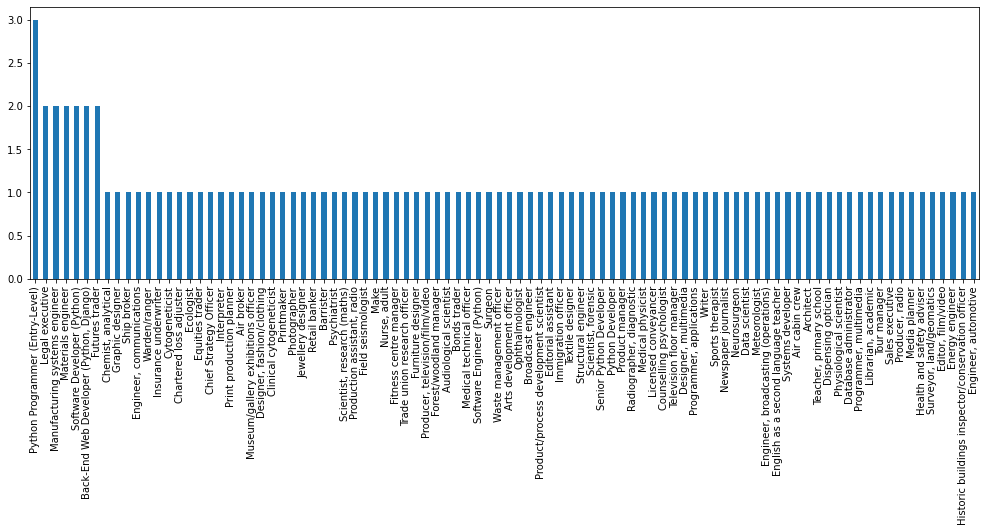

In [11]:
#PLOTTING HOW MANY JOBS POSTED
fig, ax = plt.subplots(figsize=(17,5))

df["Job"].value_counts().plot(kind='bar')
plt.show()

In [12]:
#DISPLAY JOB TITLE WITH MORE THAN 1 JOB POSTING
n_jobs = df["Job"].value_counts()

n_jobtitle = n_jobs[n_jobs > 1]

n_jobtitle

Python Programmer (Entry-Level)            3
Legal executive                            2
Manufacturing systems engineer             2
Materials engineer                         2
Software Developer (Python)                2
Back-End Web Developer (Python, Django)    2
Futures trader                             2
Name: Job, dtype: int64

In [13]:
#DISPLAY VALUE COUNTS OF COMPANY
df["Company"].value_counts()

Garcia PLC                        2
Blankenship, Knight and Powell    1
Berry-Houston                     1
Brown, Price and Campbell         1
May, Taylor and Fisher            1
                                 ..
Thompson, Sheppard and Ward       1
Kramer-Edwards                    1
Cruz-Brown                        1
Patterson-Singh                   1
Brown-Ortiz                       1
Name: Company, Length: 99, dtype: int64

In [14]:
#DISPLAY VALUE COUNTS OF LOCATION
df["Location"].value_counts()

South Saratown, AP       1
Port Susan, AE           1
West Victor, AE          1
South Christopher, AE    1
East Michaelfort, AA     1
                        ..
South Kimberly, AA       1
Stewartbury, AA          1
North Tiffany, AA        1
Adamburgh, AA            1
Wilsonmouth, AA          1
Name: Location, Length: 100, dtype: int64

In [15]:
#MAKE A DATAFRAME OF JOBS WITH MORE THAN 1 JOB POSTING
df_jobs = pd.DataFrame(n_jobs[n_jobs > 1].index[0:], columns=['Job Title'])

df_joblist = df_jobs['Job Title'].tolist()

df_joblistsort = df[df['Job'].isin(df_joblist)].drop('Date Posted', axis = 1).sort_values('Job')

df_joblistsort

,Job,Company,Location
60,"Back-End Web Developer (Python, Django)",Stewart-Alexander,"South Kimberly, AA"
70,"Back-End Web Developer (Python, Django)","Jackson, Ali and Mckee","New Elizabethside, AA"
41,Futures trader,Schneider-Brady,"North Jason, AE"
62,Futures trader,"Bryant, Santana and Davenport","Zacharyport, AA"
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA"
92,Legal executive,Hartman PLC,"West Ericstad, AA"
51,Manufacturing systems engineer,Garcia PLC,"Joybury, AE"
86,Manufacturing systems engineer,Stanley-Frederick,"Stevensland, AP"
19,Materials engineer,Smith and Sons,"South Davidtown, AP"
24,Materials engineer,"Davis, Serrano and Cook","South Tammyberg, AP"
